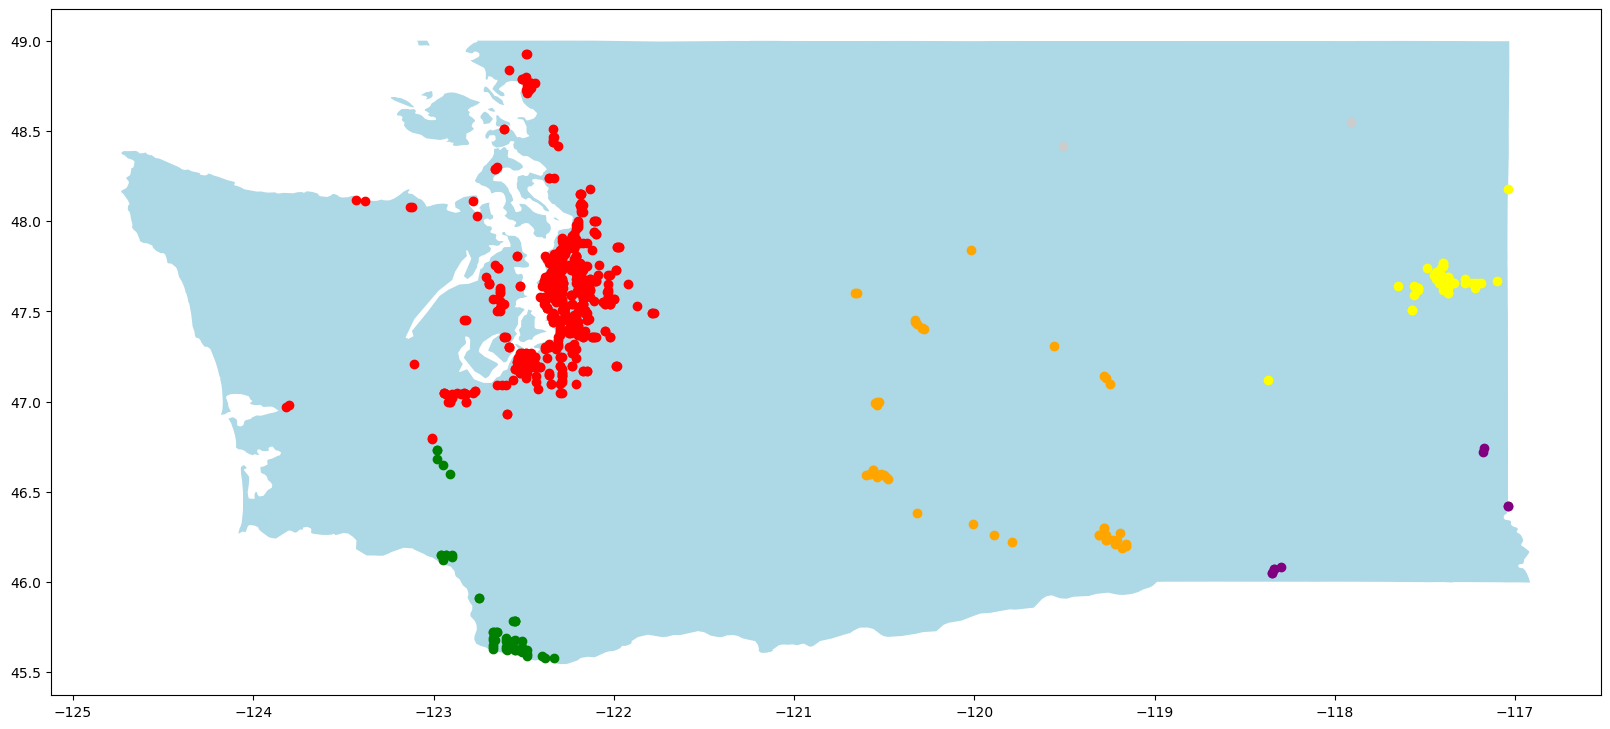

In [2]:
# Importing necessary libraries for data manipulation, plotting, and clustering
from sklearn.cluster import MeanShift
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas
from shapely.geometry import Point

# Load Starbucks location data for analysis
df = pd.read_csv('directory.csv') # Reading Starbucks location data from a CSV file

# Filter Starbucks locations to only include those in Washington (WA) state
df = df[df["State/Province"]=='WA'][["Longitude","Latitude"]] # Filtering for WA and selecting relevant columns

# Initialize MeanShift, a clustering algorithm to identify clusters of Starbucks locations
ms = MeanShift() # Instantiating the MeanShift clustering model
ms.fit(df) # Fitting the model with longitude and latitude data of Starbucks locations
cluster_centers = ms.cluster_centers_ # Extracting the coordinates of cluster centers

# Load geographic data for plotting
country = geopandas.read_file('gz_2010_us_040_00_5m.json') # Loading a GeoJSON file that contains US states' boundaries
Washington = country[(country['NAME'] == 'Washington')] # Filtering to get the boundary of Washington state

# Convert Starbucks locations into a GeoDataFrame for spatial analysis
df['coordinates'] = [Point(long, lat) for long, lat in zip(df['Longitude'], df['Latitude'])] # Creating Point geometries
starbucks_geo = geopandas.GeoDataFrame(df, geometry='coordinates') # Converting DataFrame to GeoDataFrame
starbucks_geo = starbucks_geo.assign(Color = ms.labels_) # Assigning cluster labels as colors for plotting

# Visualizing the clusters of Starbucks locations across Washington state
cluster_to_color = ['#ff0000', '#008000', '#ffff00', '#ffa500', '#800080', '#cccccc'] # Color code for different clusters
fig, ax = plt.subplots(1, figsize=(20, 20)) # Creating a figure and axis for plotting
Washington.plot(ax=ax, color = '#add8e6') # Plotting Washington state's map as the base layer
# Plotting each cluster with a unique color
for i in range(6): # Assuming there are 6 clusters
  starbucks_geo[starbucks_geo['Color']==i].plot(ax=ax, color=cluster_to_color[i]) # Plotting Starbucks locations by cluster